<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Deep-Learning-Projects/blob/main/FashinMNIST%20Classifier%20-%20LeNet5/FashionMNIST_LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Content:
1. [Import Libraries](#1)
2. [Import FashionMNIST Dataset](#2)
3. [Check Samples](#3)
4. [Normalization](#4)
5. [Model Definition](#5)
    * 5.1 [Model Training](#5.1)
    * 5.2 [Model Performance](#5.2)

# 1. Import Libraries <a id=1></a>

In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

# 2. Import FashinMNIST Dataset <a id=2><a/>

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

# Check shape

print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train Shape: (60000, 28, 28)
y_train Shape: (60000,)
X_test Shape: (10000, 28, 28)
y_test Shape: (10000,)


# 3. Check Samples <a id=3></a>

In [3]:
fashion_mnist_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


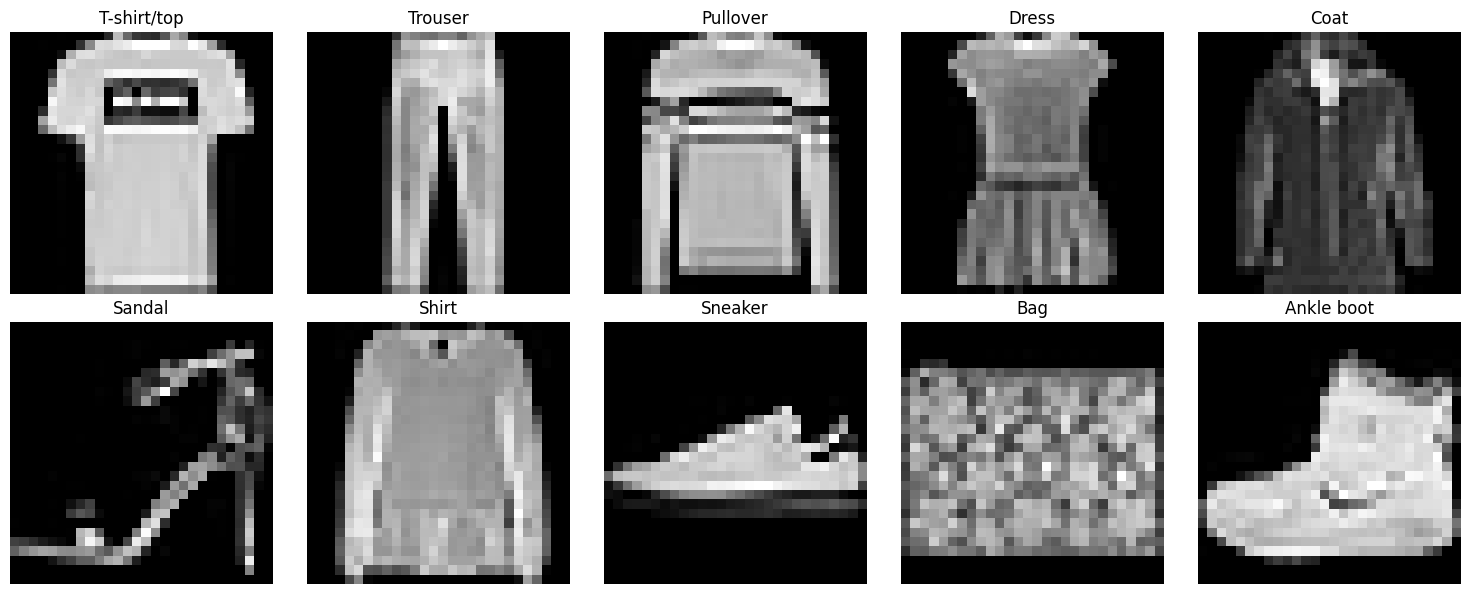

In [4]:
# Create a dictionary to store one sample of each label
samples = {i: None for i in range(10)}

# Find one sample of each label
for img, label in zip(X_train, y_train):
    if samples[label] is None:  # If we haven't found a sample for this label yet
        samples[label] = img

# Plotting
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(samples[i], cmap='gray')
    axes[i].set_title(fashion_mnist_labels[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# 4. Normalization <a id=4></a>

In [5]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape the images to match the input shape of the model
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# 5. Model Definition <a id=5></a>

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-18-12-56-51.png)

In [49]:
def LeNet5(input_shape, num_classes):
    # Define sequnetial
    model = tf.keras.Sequential()
    # Define Convolutional Layers
    # C1
    model.add(tf.keras.layers.Conv2D(
        filters=6,
        kernel_size=(5,5),
        strides=(1,1),
        activation='tanh',
        input_shape=input_shape,
        padding='same'
    ))
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    # C2
    model.add(tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=(5,5),
        strides=(1, 1),
        activation='tanh'
    ))
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten layer
    model.add(tf.keras.layers.Flatten())

    # Dense Layers
    # D1
    model.add(tf.keras.layers.Dense(
        units=120,
        activation='tanh'
    )),
    # D2
    model.add(tf.keras.layers.Dense(
        units=84,
        activation='tanh'
    )),

    # Output layer
    model.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

    return model

In [63]:
model = LeNet5((28, 28, 1), 10)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [64]:
# Check Model
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_16                 │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_17                 │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

## 5.1 Model Training <a id=5.1></a>

In [65]:
history = model.fit(X_train,
                    y_train,
                    epochs=45,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/45
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4856 - loss: 1.6570 - val_accuracy: 0.7158 - val_loss: 0.8180
Epoch 2/45
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7369 - loss: 0.7528 - val_accuracy: 0.7497 - val_loss: 0.6793
Epoch 3/45
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7707 - loss: 0.6374 - val_accuracy: 0.7712 - val_loss: 0.6175
Epoch 4/45
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7878 - loss: 0.5848 - val_accuracy: 0.7907 - val_loss: 0.5775
Epoch 5/45
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8046 - loss: 0.5455 - val_accuracy: 0.7989 - val_loss: 0.5518
Epoch 6/45
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8143 - loss: 0.5198 - val_accuracy: 0.8118 - val_loss: 0.5260
Epoch 7/45
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8243 - loss: 0.4987 - val_accuracy: 0.8179 - val_loss: 0.5084
Epoch 8/45
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8303 - loss: 0.4769 - val_accuracy: 0.

## 5.2 Model's Performance <a id=5.3></a>

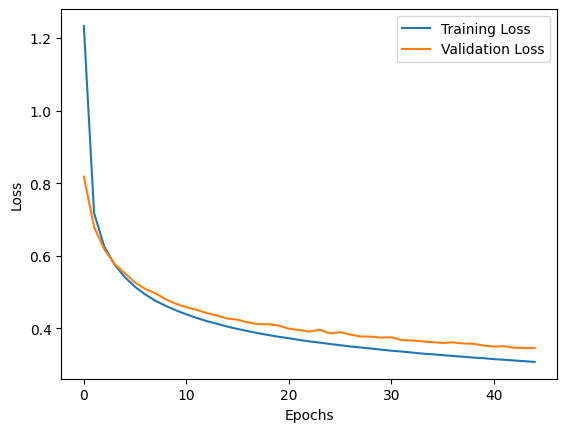

In [66]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

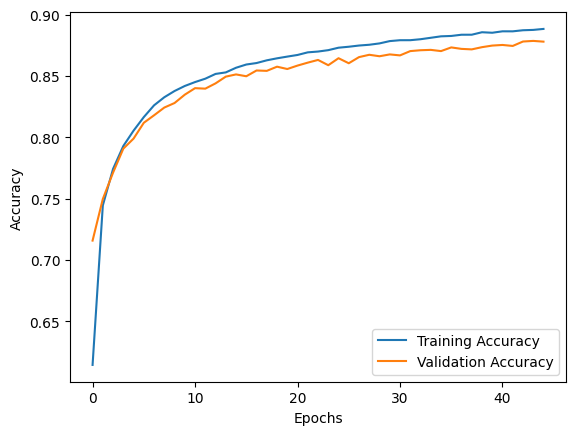

In [67]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
# Check Accuracy of the Model
loss ,acc= model.evaluate(X_test, y_test)
print('Accuracy : ', acc)
print('Loss: ', loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8797 - loss: 0.3432
Accuracy :  0.8779000043869019
Loss:  0.3455231487751007
